# Importing some packages

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Creating data

In [ ]:
N = 100
ERROR_SCALE = 0.1
TRUE_B = 1
TRUE_W = 2

np.random.seed(42)

X = np.random.rand(N, 1)
error = ERROR_SCALE * np.random.randn(N, 1)
y = TRUE_B + TRUE_W * X + error

Splitting into train and valid sets

In [ ]:
idx = np.arange(N)
np.random.shuffle(idx)
idx

array([17, 74, 43, 87,  5, 77, 14, 76, 84, 34,  6, 97, 40, 72, 59, 39, 13,
       55, 12, 58, 70, 49,  7, 24, 37,  2, 52, 45, 10, 48, 75, 67, 78, 86,
       41, 19, 26, 64, 27,  1, 42, 23, 65,  3, 44, 92, 80, 31, 95, 69, 30,
       51, 82, 73,  4, 53,  9, 88, 36, 99, 32, 35, 38, 20, 81, 71, 90, 46,
       28, 56, 50, 79, 25, 66, 21, 68, 96, 63, 60, 15, 83, 47, 33, 85, 93,
        0, 11,  8, 22, 61, 94, 89, 54, 57, 91, 98, 62, 16, 18, 29])

In [ ]:
train_idx = idx[:int(N*.8)]
val_idx = idx[int(N*.8):]

X_train, y_train = X[train_idx], y[train_idx]
X_val, y_val = X[val_idx], y[val_idx]

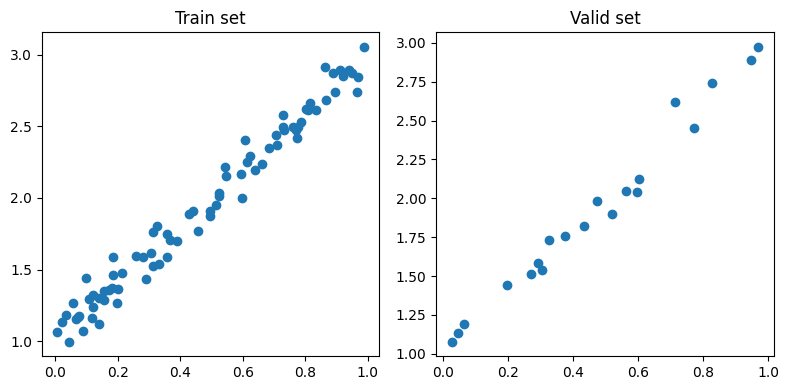

In [ ]:
fig = plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train)
plt.title("Train set")

plt.subplot(1, 2, 2)
plt.scatter(X_val, y_val)
plt.title("Valid set")

plt.tight_layout()

# First prediction

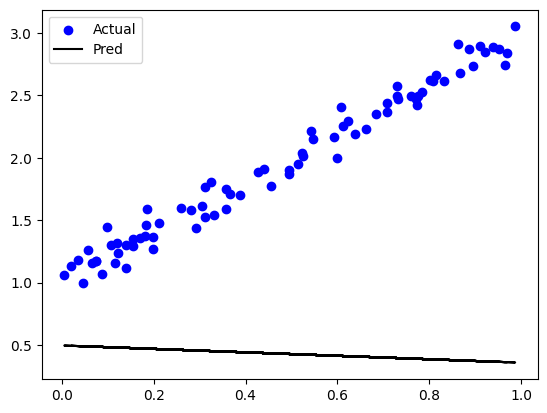

In [ ]:
np.random.seed(42)
B = np.random.randn(1)
W = np.random.randn(1)

y_train_hat = B + W * X_train

plt.scatter(X_train, y_train, label='Actual', color='blue')
plt.plot(X_train, y_train_hat, label='Pred', color='k')
plt.legend()
plt.show()

In [ ]:
b_values = np.linspace(1, 2, 5)
print(b_values)

w_values = np.linspace(0, 1, 5)
print(w_values)

bs, ws = np.meshgrid(b_values, w_values)
print(bs)
print(ws)

[1.   1.25 1.5  1.75 2.  ]
[0.   0.25 0.5  0.75 1.  ]
[[1.   1.25 1.5  1.75 2.  ]
 [1.   1.25 1.5  1.75 2.  ]
 [1.   1.25 1.5  1.75 2.  ]
 [1.   1.25 1.5  1.75 2.  ]
 [1.   1.25 1.5  1.75 2.  ]]
[[0.   0.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25 0.25]
 [0.5  0.5  0.5  0.5  0.5 ]
 [0.75 0.75 0.75 0.75 0.75]
 [1.   1.   1.   1.   1.  ]]


In [ ]:
np.apply_along_axis(
    func1d = lambda x: bs + ws * x,
    axis=1,
    arr=X_train
)

array([[[1.        , 1.25      , 1.5       , 1.75      , 2.        ],
        [1.13118911, 1.38118911, 1.63118911, 1.88118911, 2.13118911],
        [1.26237822, 1.51237822, 1.76237822, 2.01237822, 2.26237822],
        [1.39356732, 1.64356732, 1.89356732, 2.14356732, 2.39356732],
        [1.52475643, 1.77475643, 2.02475643, 2.27475643, 2.52475643]],

       [[1.        , 1.25      , 1.5       , 1.75      , 2.        ],
        [1.17671434, 1.42671434, 1.67671434, 1.92671434, 2.17671434],
        [1.35342867, 1.60342867, 1.85342867, 2.10342867, 2.35342867],
        [1.53014301, 1.78014301, 2.03014301, 2.28014301, 2.53014301],
        [1.70685734, 1.95685734, 2.20685734, 2.45685734, 2.70685734]],

       [[1.        , 1.25      , 1.5       , 1.75      , 2.        ],
        [1.2273301 , 1.4773301 , 1.7273301 , 1.9773301 , 2.2273301 ],
        [1.4546602 , 1.7046602 , 1.9546602 , 2.2046602 , 2.4546602 ],
        [1.6819903 , 1.9319903 , 2.1819903 , 2.4319903 , 2.6819903 ],
        [1.90932